# Linear Regression of Cryptocurrency

The following model I have developed to demonstrate how to extract, transform and load data and build a pipeline based on a Linear Regression problem. I aim to forecast Bitcoin (C$) prices by extrapolating historical data, training, validating and testing the model before evaluating its accuracy using a benchmark score.

## Performance Measure Selection
For the purpose of a linear regression I am selecting the Root Mean Square Error (RMSE) to measure the overall degree of error when making model my predictions. 

$$ RMSE(X,h) = \sqrt {\frac{1}{m} \sum_{i=1}^{m}(h(x^ {i})-y^ {i})^2} $$

In [1]:
import pandas as pd
import os
import tarfile
import urllib

DOWNLOAD_URL = "https://ca.finance.yahoo.com/quote/BTC-CAD/history?p=BTC-CAD"
BITCOIN_PATH = os.path.join("C:/Users/lynst/Documents/GitHub/machine-learning/machine-learning/BTC_CAD.csv")
BITCOIN_URL = DOWNLOAD_URL + "C:/Users/lynst/Documents/GitHub/machine-learning/machine-learning/BTC_CAD.csv"

def fetch_bitcoin_data(bitcoin_url=BITCOIN_URL, bitcoin_path=BITCOIN_PATH):
    os.makedirs(bitcoin_path, exist_ok=True)
    tgz_path = os.path.join(bitcoin_path)
    urllib.request.urlretrieve(bitcoin_url, tgz_path)
    bitcoin_tgz = tarfile.open(tgz_path)
    bitcoin_tgz.extract_all(path=bitcoin_path)
    bitcoin_tgz.close()
    
def load_bitcoin_data(bitcoin_path=BITCOIN_PATH):
    csv_path = os.path.join(bitcoin_path)
    return pd.read_csv(csv_path)

Start by loading the Canadian denominated Bitcoin data below.

In [2]:
btc_cad = load_bitcoin_data()
btc_cad.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-21,9718.074219,9838.333008,9728.248047,9763.935547,9763.935547,4.624843e+10
1,2020-04-22,9762.682617,10125.870120,9747.394531,10096.278320,10096.278320,4.716635e+10
2,2020-04-23,10102.092770,10533.734380,10009.763670,10451.163090,10451.163090,6.119120e+10
3,2020-04-24,10457.432620,10678.707030,10457.432620,10642.806640,10642.806640,4.881932e+10
4,2020-04-25,10642.216800,10773.176760,10601.609380,10669.635740,10669.635740,4.643028e+10


Each column represents a different feature, for example 'High', 'Low' and 'Close' prices are all features. These features are also known as attributes, input, or predictor variables which can be used to ascertain a stock price prediction (called labels, output, or target variables).

In [3]:
# get stock info
print(btc_cad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       362 non-null    float64
 2   High       362 non-null    float64
 3   Low        362 non-null    float64
 4   Close      362 non-null    float64
 5   Adj Close  362 non-null    float64
 6   Volume     362 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB
None


The following method gives a breakdown of the first and last entries in the dataset.

In [4]:
btc_cad.info

<bound method DataFrame.info of            Date          Open          High           Low         Close  \
0    2020-04-21   9718.074219   9838.333008   9728.248047   9763.935547   
1    2020-04-22   9762.682617  10125.870120   9747.394531  10096.278320   
2    2020-04-23  10102.092770  10533.734380  10009.763670  10451.163090   
3    2020-04-24  10457.432620  10678.707030  10457.432620  10642.806640   
4    2020-04-25  10642.216800  10773.176760  10601.609380  10669.635740   
..          ...           ...           ...           ...           ...   
361  2021-04-17  76964.703130  78268.406250  75503.000000  75906.359380   
362  2021-04-18  75928.953130  76373.718750  66081.828130  70374.906250   
363  2021-04-19  70344.109380  71803.609380  68107.265630  69788.234380   
364  2021-04-20           NaN           NaN           NaN           NaN   
365  2021-04-21  71509.304690  71556.757810  71132.078130  71477.757810   

        Adj Close        Volume  
0     9763.935547  4.624843e+10  

To view some of the summary statistics I will use the describe() method.

In [5]:
btc_cad.describe()

,Open,High,Low,Close,Adj Close,Volume
count,362.000000,362.000000,362.000000,362.000000,362.000000,3.620000e+02
mean,29707.219509,30555.675634,28874.214073,29864.750594,29864.750594,5.364938e+10
std,21773.554061,22482.286397,20992.767955,21845.825379,21845.825379,3.297456e+10
min,9718.074219,9838.333008,9728.248047,9763.935547,9763.935547,1.663903e+10
25%,13373.918455,13684.485110,13056.077148,13421.041262,13421.041262,3.142625e+10
50%,16520.156250,17169.826175,16253.259275,16921.556640,16921.556640,4.716901e+10
75%,44679.113283,46686.911130,41998.325195,45279.527345,45279.527345,6.929678e+10
max,79623.851560,81445.671880,77726.054690,79598.406250,79598.406250,4.470000e+11


So I can tell the average closing price is C$29,865 to the nearest integer. 

There isn't much data to work from (one years worth exactly), but I would like to create a dataframe object from the price data and try and use it to forecast future price information.

# Import Libraries
The bulk of the libraries I will use are as follows. This may change as I progress.

In [6]:
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

Taking a look at which columns are present in the dataset gives me:

In [7]:
btc_cad.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

And now lets see the first and last 5 entries in the table:

In [8]:
btc_cad.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-21,9718.074219,9838.333008,9728.248047,9763.935547,9763.935547,4.624843e+10
1,2020-04-22,9762.682617,10125.870120,9747.394531,10096.278320,10096.278320,4.716635e+10
2,2020-04-23,10102.092770,10533.734380,10009.763670,10451.163090,10451.163090,6.119120e+10
3,2020-04-24,10457.432620,10678.707030,10457.432620,10642.806640,10642.806640,4.881932e+10
4,2020-04-25,10642.216800,10773.176760,10601.609380,10669.635740,10669.635740,4.643028e+10


And now the tail of the dataframe.

In [9]:
btc_cad.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2021-04-17,76964.70313,78268.40625,75503.00000,75906.35938,75906.35938,8.272967e+10
362,2021-04-18,75928.95313,76373.71875,66081.82813,70374.90625,70374.90625,1.220000e+11
363,2021-04-19,70344.10938,71803.60938,68107.26563,69788.23438,69788.23438,8.183693e+10
364,2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN
365,2021-04-21,71509.30469,71556.75781,71132.07813,71477.75781,71477.75781,8.495634e+10


# Cleaning the Data
A brief look at the summary info for the dataset tells me there are a different number of date values compared to the rest of the column entries. This will need to be addressed, followed by any missing values, NaN, 'isnull' or entries with 'zero'. I can also see the different number 'count' for entries using the count() method:

In [10]:
btc_cad.count()

Date         366
Open         362
High         362
Low          362
Close        362
Adj Close    362
Volume       362
dtype: int64

First I just want to see what shape the dataframe is.

In [11]:
btc_cad.shape

(366, 7)

So it's 366 rows by 7 columns or a (366x7) matrix.

Next, to find the total number of missing entries.

In [12]:
bitcoin_missing_values_count = btc_cad.isnull().sum()
bitcoin_missing_values_count[0:7]

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

Further examination allows me to calculate the total number of rows containing missing data points as a percentage of the total number of rows in the dataframe.

In [13]:
total_bitcoin = np.product(btc_cad.shape)
total_missing_bitcoin = bitcoin_missing_values_count.sum()

percent_missing_values = (total_missing_bitcoin/total_bitcoin) * 100
print(percent_missing_values)

0.936768149882904


From this I can see that just under 1% of the total values are missing. I can either choose to leave them out completely (as they may not really affect my model for the purpose of this exercise) or use imputed values such as the mean or median.

## Removing Rows
Having checked the csv file I can determine that there is no real reason for the missing values (null entries) for these dates. At first I thought these missing values might be due to public holidays but because Bitcoin is a currency, it appears to be traded OTC (Over The Counter) beyong normal trading hours throughout the day, seven days a week. As a result I have chosen to leave these missing values out using the dropna() method to eliminate them.

In [14]:
btc_cad = btc_cad.dropna(axis=0)

In [15]:
btc_cad.count()

Date         362
Open         362
High         362
Low          362
Close        362
Adj Close    362
Volume       362
dtype: int64

This time there are exactly 362 rows for each column. It's important to set the argument (axis=0) otherwise dropping the values doesn't work. 

## Removing Columns

The values in the 'Adj Close' column are exactly the same as in the 'Close' column so I will remove 'Adj Close' completely from the dataset in an attempt to regularize the model. This is unecessary data which can be removed as it could contribute to bias and bleed into the test data. It's better to reduce the overall number of variables particularly removing those which are not relevant.

In [16]:
btc_cad.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:
del btc_cad['Adj Close']

In [25]:
btc_cad.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Next, I will create a variable to hold the data columns using indexation.

In [27]:
bitcoin = btc_cad

# Exploratory Data Analysis

The mean value for the Bitcoin (CAD) close price is C$ 29,864.75 and from the summary statistics using 'describe()' I can also see the maximum values in the upper-quartile range have been tested regularly.

As there are no dividends or stock splits because Bitcoin is a currency (medium of exchange / store of value), only 6 columns are of any use to me in this particular dataset: Date, Open, High, Low, Close and Volume. Printing the first 5 lines of the dataframe gives:

In [33]:
print(bitcoin[:5])

         Date          Open          High           Low         Close  \
0  2020-04-21   9718.074219   9838.333008   9728.248047   9763.935547   
1  2020-04-22   9762.682617  10125.870120   9747.394531  10096.278320   
2  2020-04-23  10102.092770  10533.734380  10009.763670  10451.163090   
3  2020-04-24  10457.432620  10678.707030  10457.432620  10642.806640   
4  2020-04-25  10642.216800  10773.176760  10601.609380  10669.635740   

         Volume  
0  4.624843e+10  
1  4.716635e+10  
2  6.119120e+10  
3  4.881932e+10  
4  4.643028e+10  


Next I want to split the data into predictors and a target variable, containing all my feature columns in one table variable and the target variable in a column vector. The prediction target can be assigned as follows:

In [34]:
y = bitcoin.Close

The features are a selection of columns used to predict 'y', including

In [35]:
bitcoin_features = ['Date','Open','High','Low','Volume']

In [36]:
X = bitcoin[bitcoin_features]

So currently I can determine that Bitcoin was trading well below the mean (12 months ago) and more recently it's trading at roughly 130% above the mean for the last 12 month period. 

Time for some interval analysis where I will attempt to place OHLC values in different interval buckets based on the number of counts, but first I ned to create a plot.

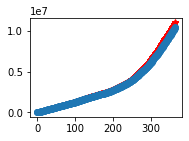

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)

plt.plot(X['Open'].cumsum(), 'k--')
plt.plot(X['High'].cumsum(), 'r*')
plt.plot(X['Low'].cumsum(), 'o--')

In [50]:
y.describe()

count      362.000000
mean     29864.750594
std      21845.825379
min       9763.935547
25%      13421.041262
50%      16921.556640
75%      45279.527345
max      79598.406250
Name: Close, dtype: float64

In [51]:
y.mean()

29864.750594163

In [52]:
y.std()

21845.825378577985

In [55]:
X.describe()

,Open,High,Low,Volume
count,362.000000,362.000000,362.000000,3.620000e+02
mean,29707.219509,30555.675634,28874.214073,5.364938e+10
std,21773.554061,22482.286397,20992.767955,3.297456e+10
min,9718.074219,9838.333008,9728.248047,1.663903e+10
25%,13373.918455,13684.485110,13056.077148,3.142625e+10
50%,16520.156250,17169.826175,16253.259275,4.716901e+10
75%,44679.113283,46686.911130,41998.325195,6.929678e+10
max,79623.851560,81445.671880,77726.054690,4.470000e+11


In [56]:
X.mean()

Open      2.970722e+04
High      3.055568e+04
Low       2.887421e+04
Volume    5.364938e+10
dtype: float64

In [57]:
X.std()

Open      2.177355e+04
High      2.248229e+04
Low       2.099277e+04
Volume    3.297456e+10
dtype: float64